In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import collections
import re

In [46]:
# Define the file path
file_path = "/Users/shameekphukan/Downloads/instagram graph - Sheet4.csv"

# Load the CSV file
df = pd.read_csv(file_path)

# Display the first few rows to understand its structure
df.head()


,username,mutuals
0,sampreeti.das,"deyevrana,\nleen_dt,\n_hiyamunu_,\nminiii_p,\n..."
1,pr.__i,"shitarchives_,\n_acid.jazz,\nprayas_chetia,\nv..."
2,nengminza_,"_acid.jazz,\nshank_roy,\nsaprahise,\nft_rahman..."
3,ishanichanda,"saufyeehaw,\nomkarnagarhalli,\nenzo_scalzone,\..."
4,5ti._.lm,"enzo_scalzone,\nshroomnik,\nrwiti_09,\nnaana_1..."


In [47]:
# Function to clean and properly separate mutuals
def clean_mutuals(mutuals):
    if isinstance(mutuals, str):
        # Replace any inconsistent separators (like spaces, commas without newlines) with a standard comma
        cleaned = re.sub(r'[\s,]+', ',', mutuals.strip())
        return cleaned.split(",")  # Return as a list
    return []

# Apply cleaning function
df["mutuals"] = df["mutuals"].apply(clean_mutuals)

df.head()

,username,mutuals
0,sampreeti.das,"[deyevrana, leen_dt, _hiyamunu_, miniii_p, cok..."
1,pr.__i,"[shitarchives_, _acid.jazz, prayas_chetia, var..."
2,nengminza_,"[_acid.jazz, shank_roy, saprahise, ft_rahman01..."
3,ishanichanda,"[saufyeehaw, omkarnagarhalli, enzo_scalzone, s..."
4,5ti._.lm,"[enzo_scalzone, shroomnik, rwiti_09, naana_121..."


In [48]:
def add_shameekphukan(mutuals):
    if "shameekphukan" not in mutuals:
        mutuals.append("shameekphukan")
    return mutuals

# Apply function to add "shameekphukan" to each mutual list
df["mutuals"] = df["mutuals"].apply(add_shameekphukan)

df.head()

,username,mutuals
0,sampreeti.das,"[deyevrana, leen_dt, _hiyamunu_, miniii_p, cok..."
1,pr.__i,"[shitarchives_, _acid.jazz, prayas_chetia, var..."
2,nengminza_,"[_acid.jazz, shank_roy, saprahise, ft_rahman01..."
3,ishanichanda,"[saufyeehaw, omkarnagarhalli, enzo_scalzone, s..."
4,5ti._.lm,"[enzo_scalzone, shroomnik, rwiti_09, naana_121..."


In [49]:
# # Function to remove "shameekphukan" from mutuals
# def remove_shameekphukan(mutuals):
#     return [m for m in mutuals if m != "shameekphukan"]

# # Apply function to remove "shameekphukan"
# df["mutuals"] = df["mutuals"].apply(remove_shameekphukan)


In [50]:
df['mutual_count'] = df['mutuals'].apply(len)

df.head()

,username,mutuals,mutual_count
0,sampreeti.das,"[deyevrana, leen_dt, _hiyamunu_, miniii_p, cok...",6
1,pr.__i,"[shitarchives_, _acid.jazz, prayas_chetia, var...",57
2,nengminza_,"[_acid.jazz, shank_roy, saprahise, ft_rahman01...",56
3,ishanichanda,"[saufyeehaw, omkarnagarhalli, enzo_scalzone, s...",35
4,5ti._.lm,"[enzo_scalzone, shroomnik, rwiti_09, naana_121...",38


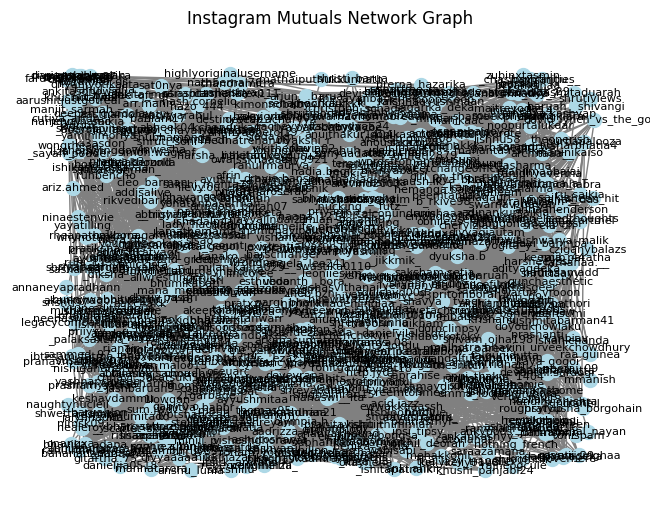

In [51]:
import networkx as nx
import matplotlib.pyplot as plt

# build the graph with cleaned data
G = nx.Graph()

for index, row in df.iterrows():
    user = row["username"]
    mutuals = row["mutuals"]
    
    G.add_node(user)  # Add user node
    
    for mutual in mutuals:
        mutual = mutual.strip()
        if mutual:
            G.add_node(mutual)  # Add mutual connection node
            G.add_edge(user, mutual)  # Create an edge

# Plot the cleaned graph
pos = nx.random_layout(G)
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=100, font_size=8)

plt.title("Instagram Mutuals Network Graph")
plt.show()

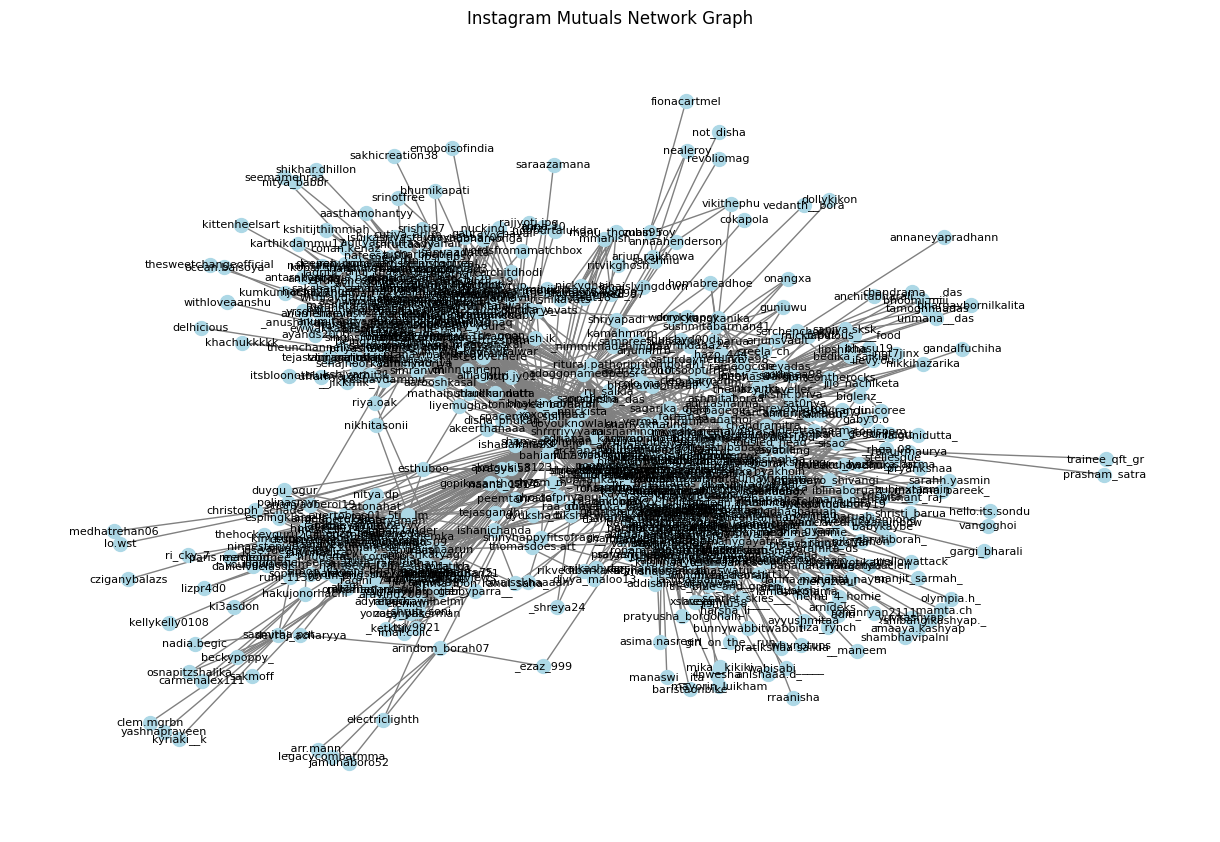

In [52]:
# Plot the cleaned graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=100, font_size=8)

plt.title("Instagram Mutuals Network Graph")
plt.show()

In [53]:
# # Plot the graph, keeping only the labels for "soundaryavats" and "shameekphukan"
# plt.figure(figsize=(12, 8))
# pos = nx.spring_layout(G, seed=42)

# nx.draw(G, pos, with_labels=False, node_color="lightblue", edge_color="gray", node_size=100, font_size=8)
# nx.draw_networkx_labels(G, pos, labels={"soundaryavats": "soundaryavats", "shameekphukan": "shameekphukan"}, font_size=10, font_color="red")

# plt.title("Updated Instagram Mutuals Network Graph (Labels: soundaryavats & shameekphukan)")
# plt.show()

In [54]:
G.degree()

DegreeView({'sampreeti.das': 7, 'deyevrana': 10, 'leen_dt': 12, '_hiyamunu_': 14, 'miniii_p': 3, 'cokapola': 1, 'shameekphukan': 236, 'pr.__i': 59, 'shitarchives_': 15, '_acid.jazz': 19, 'prayas_chetia': 9, 'varunpradhaan': 13, '_shubham.banik_': 10, 'ft_rahman01': 57, 'prashanti___': 41, 'ayushman247': 17, 'prerak__sharma': 21, 'sunainabaruah': 74, 'ariz.ahmed': 24, 'itsirk_amrahs': 17, 'lil__rak': 27, '21garbage_': 9, '_swarnav_nayan_': 14, '_adarsh._.agarwal_': 16, '_milibar_': 65, '_chasinginfinities_': 40, 'hemanga.baishya.9': 14, 'fardeen.imdad': 32, 'suncraftsandbakes': 48, 'wrongpee_': 28, 'obhilees': 35, 'craheil': 61, '_shaunak_29': 19, 'bora.ritu_': 10, 'abhilasha.sarma': 28, 'shalbi.r.aked': 12, '__darshana': 23, 'hirawat.tejas': 19, 'archanaraii': 36, 'srijit._banerjee': 42, 'barnaliisarma': 13, '__milan.kalita029__': 23, 'musumi__': 53, 'adnankhasgeer': 12, 'rishapsarmah': 7, 'parbishakhaund': 7, 'swarnav___': 18, 'vahbiav__': 15, 'architaaa__': 24, 'adityarl': 24, 'king_

Text(0.5, 0, 'Degree')

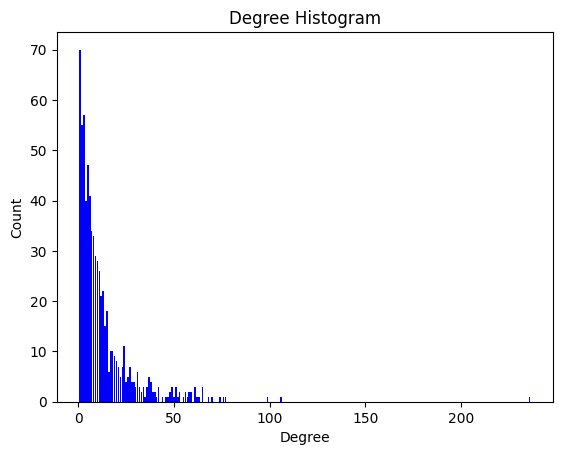

In [55]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())  # item() returns the dictionary's key-value pairs

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color="b")
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")

In [56]:
average_mutuals = df['mutual_count'].mean()
print(f"The average number of mutuals is {average_mutuals:.0f} people")

The average number of mutuals is 24 people


In [45]:
df[df['mutual_count'] > 0]['mutual_count'].value_counts()[:20]

mutual_count
8     10
25    10
12    10
10     9
9      9
4      9
17     8
2      8
20     8
11     8
7      7
28     7
6      7
19     7
36     6
27     6
30     5
21     5
5      5
13     5
Name: count, dtype: int64

In [71]:
print(
    "\033[1m Nodes \033[0m",
    "\033[1m Degree \033[0m ",
    "\033[1m Eigenvector-centrality \033[0m",
)
for node in G.nodes:
    print(
        f"{node}: {G.degree[node]}，{nx.eigenvector_centrality_numpy(G, weight=None)[node]}"
    )

 Nodes   Degree    Eigenvector-centrality 
sampreeti.das: 7，0.016717456085471708
deyevrana: 10，0.014814017784407255
leen_dt: 12，0.0319898362032242
_hiyamunu_: 14，0.04511379502655627
miniii_p: 3，0.006816759012573073
cokapola: 1，0.0005326053261117803
shameekphukan: 236，0.3235898478065936
pr.__i: 59，0.1452949514044416
shitarchives_: 15，0.05695223433843608
_acid.jazz: 19，0.040733667618893424
prayas_chetia: 9，0.025662458066510893
varunpradhaan: 13，0.04352974431990887
_shubham.banik_: 10，0.03556235698781752
ft_rahman01: 57，0.11784591794028712
prashanti___: 41，0.10853288325425571
ayushman247: 17，0.057582673272858646
prerak__sharma: 21，0.04068264117841709
sunainabaruah: 74，0.15717324966205568
ariz.ahmed: 24，0.06360204278223903
itsirk_amrahs: 17，0.04434218957643932
lil__rak: 27，0.044200902206339876
21garbage_: 9，0.029306717054531695
_swarnav_nayan_: 14，0.042928079871226016
_adarsh._.agarwal_: 16，0.057274628743799294
_milibar_: 65，0.13518200152904852
_chasinginfinities_: 40，0.10100435964271225
h

In [72]:
EigenCen_dic = nx.eigenvector_centrality_numpy(G, weight=None)
{k: v for k, v in sorted(EigenCen_dic.items(), key=lambda item: item[1], reverse=True)}

{'shameekphukan': 0.32358984780659356,
 'divyagjautam': 0.19776642403629235,
 'sunainabaruah': 0.1571732496620556,
 'pr.__i': 0.14529495140444157,
 'king__shook': 0.13701051328780345,
 'reshab__': 0.13608336511815855,
 '_milibar_': 0.13518200152904825,
 'http.jy01': 0.13373738804032165,
 '_i.am.agam_': 0.12614914393020987,
 'musumi__': 0.12614776130751398,
 'abhigyan_bishaya': 0.12497717487586874,
 'suncraftsandbakes': 0.12169020482795599,
 'ft_rahman01': 0.11784591794028694,
 'nengminza_': 0.1149308136925968,
 'mimi_xviii': 0.11401388366024223,
 'visheshghorawat': 0.11393769432320529,
 'craheil': 0.10997282300921532,
 'prashanti___': 0.10853288325425584,
 'reverse_bhaskar': 0.10759687738131908,
 'srijit._banerjee': 0.10487528349322377,
 'adoggonamedpepsi': 0.10187190941054511,
 '_chasinginfinities_': 0.10100435964271202,
 'archanaraii': 0.0964422007139299,
 '_nanditadas_': 0.09509431595491259,
 'thisisananyasaccount': 0.09491703674991951,
 'woahsumi': 0.09193588975603996,
 'whimsicalb

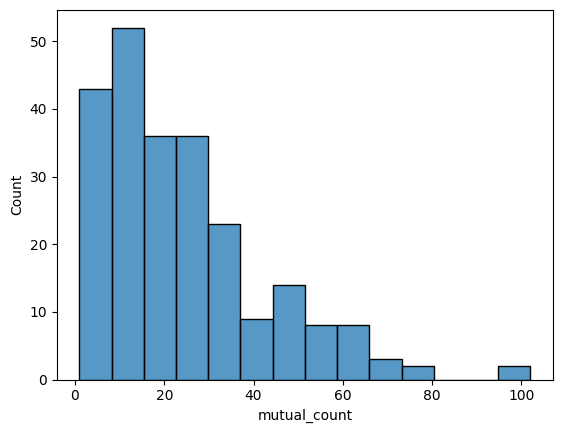

In [101]:
sns.histplot(df[df['mutual_count'] > 0]['mutual_count'])
#sns.histplot(df['mutual_count'])

plt.show()

In [102]:
print(f"{len(G.nodes)=}, {len(G.edges)=}")

len(G.nodes)=710, len(G.edges)=4649


In [103]:
import numpy as np

In [104]:
np.mean(list(nx.eccentricity(G).values()))

3.664788732394366

In [105]:
import networkx as nx

# Assuming your graph variable is named 'g'
eigenvalues = nx.linalg.spectrum.adjacency_spectrum(G)
L = nx.laplacian_matrix(G).toarray()
eigenvalues = np.linalg.eigvals(L)
sorted_eigenvalues = np.sort(eigenvalues)
print("Eigenvalues of the Laplacian matrix:", sorted_eigenvalues)
# print(eigenvalues)

Eigenvalues of the Laplacian matrix: [1.10134124e-13+0.00000000e+00j 2.68005310e-01+0.00000000e+00j
 3.81475701e-01+0.00000000e+00j 3.91868587e-01+0.00000000e+00j
 4.01758465e-01+0.00000000e+00j 4.40324134e-01+0.00000000e+00j
 5.15097699e-01+0.00000000e+00j 5.83008792e-01+0.00000000e+00j
 5.99104866e-01+0.00000000e+00j 6.23191813e-01+0.00000000e+00j
 6.36292222e-01+0.00000000e+00j 6.75824782e-01+0.00000000e+00j
 7.52199230e-01+0.00000000e+00j 7.84099231e-01+0.00000000e+00j
 8.16606604e-01+0.00000000e+00j 8.26364377e-01+0.00000000e+00j
 8.39843260e-01+0.00000000e+00j 8.44930772e-01+0.00000000e+00j
 8.95630935e-01+0.00000000e+00j 9.05602311e-01+0.00000000e+00j
 9.15526868e-01+0.00000000e+00j 9.21821975e-01+0.00000000e+00j
 9.22799927e-01+0.00000000e+00j 9.26470990e-01+0.00000000e+00j
 9.32737693e-01+0.00000000e+00j 9.37738662e-01+0.00000000e+00j
 9.41252632e-01+0.00000000e+00j 9.43099607e-01+0.00000000e+00j
 9.48532911e-01+0.00000000e+00j 9.49118189e-01+0.00000000e+00j
 9.51388472e-01+0.

In [106]:
floyd_marsh = nx.floyd_warshall_numpy(G, nodelist=sorted(G.nodes()))
floyd_marsh

array([[0., 1., 3., ..., 3., 2., 3.],
       [1., 0., 3., ..., 4., 3., 3.],
       [3., 3., 0., ..., 4., 3., 4.],
       ...,
       [3., 4., 4., ..., 0., 3., 4.],
       [2., 3., 3., ..., 3., 0., 3.],
       [3., 3., 4., ..., 4., 3., 0.]])

In [107]:
nx.algebraicconnectivity.algebraic_connectivity(G)

0.2680053095554982

In [108]:
max_clique = nx.approximation.max_clique(G)
len(max_clique)

13

Text(0.5, 1.0, 'Distribution of the length of shortest path between every two nodes')

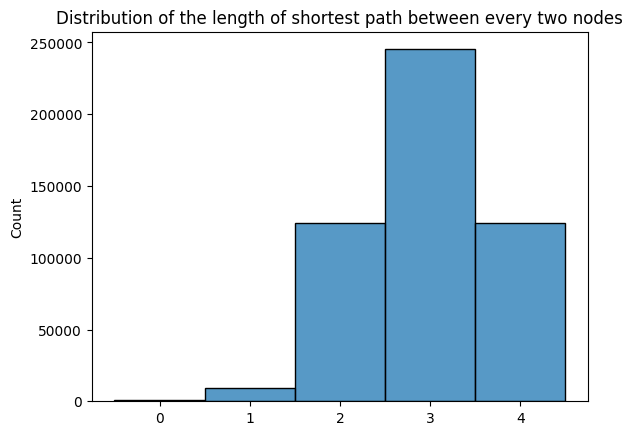

In [109]:
shp = nx.all_pairs_shortest_path_length(G)
shortest_paths_length = []

for u in shp:
    shortest_paths_length.extend(u[1].values())

sns.histplot(shortest_paths_length, discrete=True).set_title('Distribution of the length of shortest path between every two nodes')

In [110]:
average_shortest_paths = nx.average_shortest_path_length(G)
print(f"Average shortest paths (excluding individual nodes): {average_shortest_paths}")

print(f"Diameter = {nx.diameter(G)}")


Average shortest paths (excluding individual nodes): 2.96270883410477
Diameter = 4


In [111]:
len(nx.dominating_set(G))

434

In [112]:
nx.node_connectivity(G)

1

In [113]:
pip install python-louvain


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


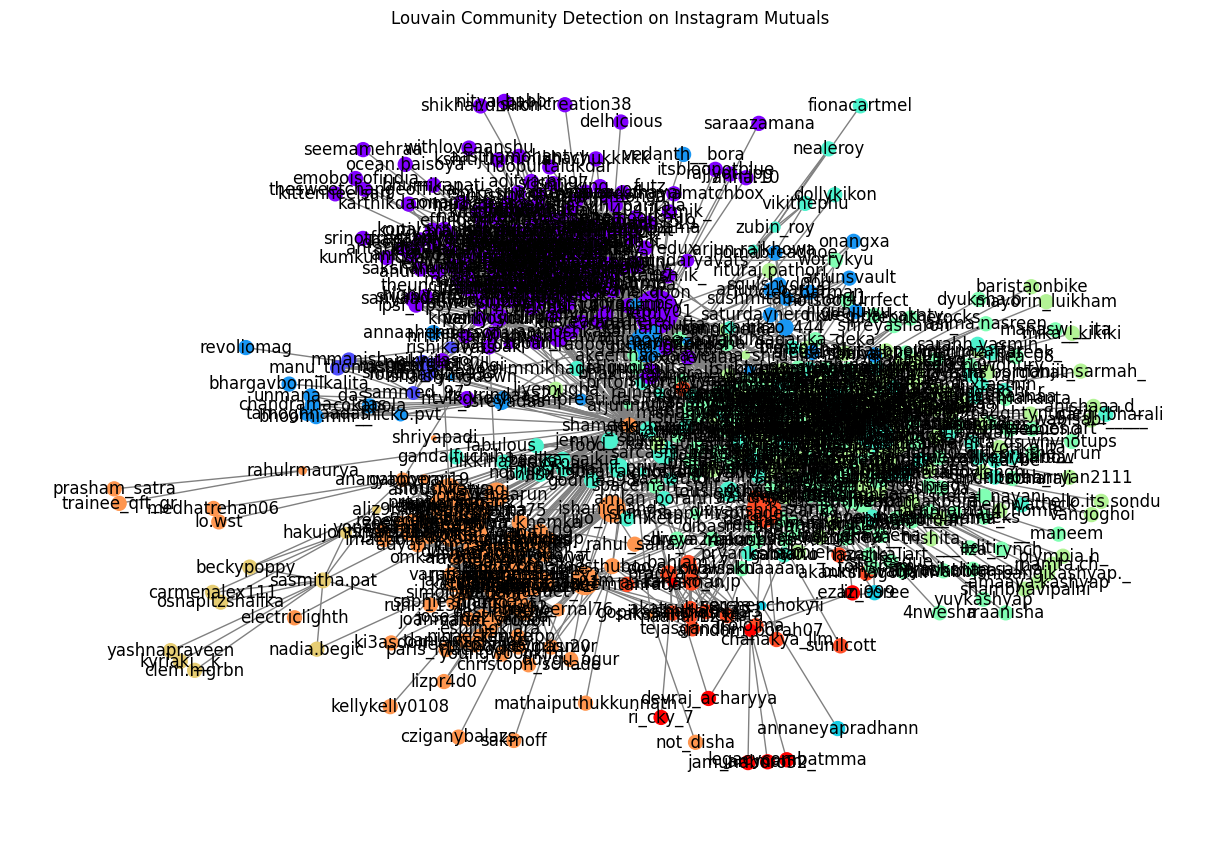

In [114]:
import community  # pip install python-louvain
import matplotlib.pyplot as plt

# Compute the best partition using Louvain
partition = community.best_partition(G)

# Assign colors to communities
colors = [partition[node] for node in G.nodes()]

# Plot the graph with community-based colors
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)

nx.draw(G, pos, with_labels=True, node_color=colors, cmap=plt.cm.rainbow, edge_color="gray", node_size=node_sizes)
plt.title("Louvain Community Detection on Instagram Mutuals")
plt.show()


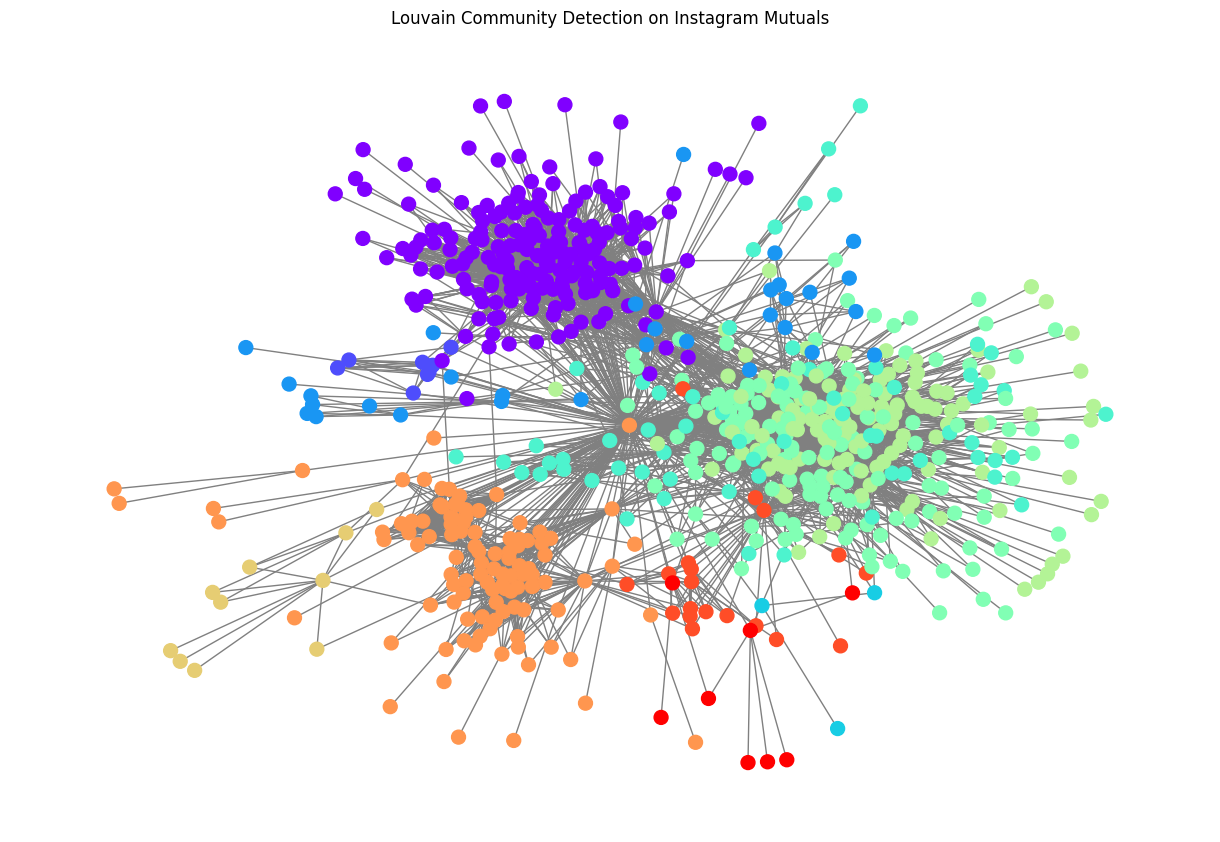

In [115]:
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)

nx.draw(G, pos, with_labels=False, node_color=colors, cmap=plt.cm.rainbow, edge_color="gray", node_size=100)
plt.title("Louvain Community Detection on Instagram Mutuals")
plt.show()
